In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *
import torch
import skimage
from PIL import Image

In [2]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/Tipo3Oversampling/Completo')
dls = ImageDataLoaders.from_folder(path, train='train', valid='valid', bs=9, seed=43)

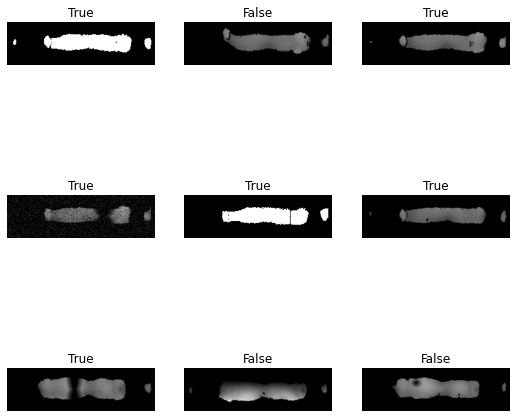

In [3]:
dls.show_batch()

In [4]:
precision = Precision()
f1 = F1Score()

In [5]:
learn = cnn_learner(dls, models.resnet34,normalize=True,pretrained=True,
                    metrics=[accuracy, precision, f1],opt_func=SGD)

SuggestedLRs(lr_min=0.004786301031708717, lr_steep=6.309573450380412e-07)

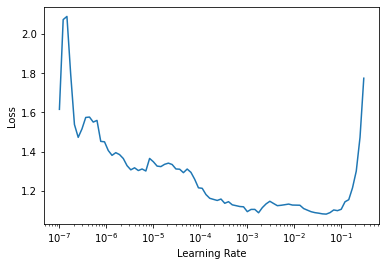

In [6]:
learn.lr_find()

In [7]:
learn.fit(5,lr=0.002)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.431884,0.467951,0.779286,0.943311,0.729185,00:36
1,0.310500,0.274525,0.872857,0.948454,0.861154,00:36
2,0.208080,0.188792,0.915000,0.914408,0.915061,00:37
3,0.239416,0.170864,0.933571,0.929279,0.933902,00:37
4,0.191354,0.184898,0.927143,0.942308,0.925872,00:37


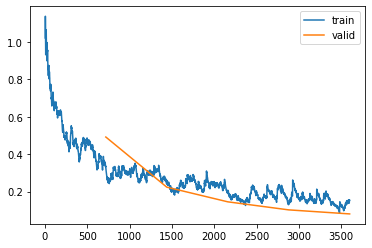

In [8]:
learn.recorder.plot_loss()

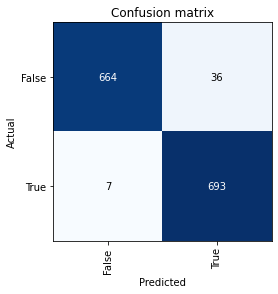

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [82]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/' +
            'Tipo3Oversampling/Completo/train/False/' +
            'Mdia_1_Pieza_40_Soldadura_79_7.png')

path2 = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/' +
            'Tipo2Oversampling/Completo/train/False/' +
            'Mdia_1_Pieza_1_Soldadura_42_9.png')


In [109]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/' +
            'Tipo3Oversampling/Completo/train/False/' +
            'Mdia_1_Pieza_40_Soldadura_79_7.png')
img = PILImage.create(path)
x, = first(dls.test_dl([img]))

In [110]:
class Hook():
    def hook_func(self, m, i, o): self.stored = o.detach().clone()

In [111]:
salida_hook = Hook()
hook = learn.model[0].register_forward_hook(salida_hook.hook_func)

In [112]:
with torch.no_grad(): output = learn.model.eval()(x)

In [113]:
act = salida_hook.stored[0]
salida = F.softmax(output, dim=-1)

In [114]:
dls.vocab

['False', 'True']

In [115]:
x.shape

torch.Size([1, 3, 70, 240])

In [116]:
mapaCAM = torch.einsum('ck,kij->cij', learn.model[1][-1].weight, act)
mapaCAM.shape

torch.Size([2, 3, 8])

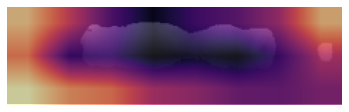

In [121]:
x_dec = TensorImage(dls.train.decode((x,))[0][0])
_,ax = plt.subplots()
x_dec.show(ctx=ax)
ax.imshow(mapaCAM[1].detach().cpu(), alpha=0.8, extent=(0,240,70,0),
interpolation='bilinear', cmap='magma', aspect='equal');

In [53]:
ax.imshow(mapaCAM[0].detach().cpu(), alpha=0.8, extent=(0,240,70,0),
interpolation='bilinear', cmap='magma');


AttributeError: 'list' object has no attribute 'imshow'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [10]:
img = Image.open('/home/yani/TFG-Memoria/img/base/output-onlinepngtools2.png')
img = img.resize((240,70))


In [11]:
img2 = Image.open('/home/yani/TFG-Memoria/img/base/output-onlinepngtools.png')

img2 = img2.resize((240,70))

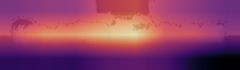

In [12]:
display(img)


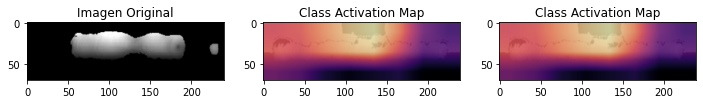

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

w = 280
h = 70
lista = []
path2 = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/' +
            'Tipo3Oversampling/Completo/train/False/' +
            'Mdia_1_Pieza_40_Soldadura_79_7.png')

lista.append(path2)
lista.append(img)
lista.append(img2)

fig = plt.figure(figsize=(12,5))

columns = 3
rows = 1
ax = []

for i in range(3):
    if i == 0:
        img = Image.open(lista[i]).convert('LA')
    else:
        img = lista[i]
    ax.append(fig.add_subplot(rows, columns, i+1))
    plt.imshow(img)
ax[0].title.set_text('Imagen Original')
ax[1].title.set_text('Class Activation Map')
ax[2].title.set_text('Class Activation Map')

plt.show()

In [2]:
import cv2
import numpy as np
from PIL import Image

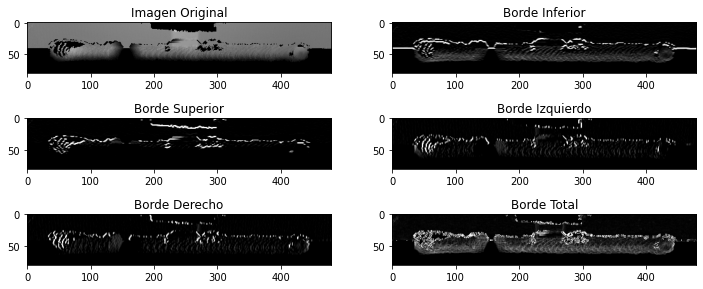

In [39]:
img = cv2.imread('/home/yani/Pruebas TFG/DatasetConIncorrectas/' +
            'Tipo2Oversampling/Soldadura_Buena/dia_1_Pieza_2_Soldadura_45_cortv.png')

kernelx_1 = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernelx_2 = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

kernely_1 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
kernely_2 = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

salida1 = cv2.filter2D(img, -1, kernelx_1)
salida2 = cv2.filter2D(img, -1, kernelx_2)

salida3 = cv2.filter2D(img, -1, kernely_1)
salida4 = cv2.filter2D(img, -1, kernely_2)

salida5 = salida1 + salida2 + salida3 + salida4

salida1 = Image.fromarray(salida1)
salida2 = Image.fromarray(salida2)
salida3 = Image.fromarray(salida3)
salida4 = Image.fromarray(salida4)
salida5 = Image.fromarray(salida5)

w = 280
h = 70
lista = []
lista.append(img)
lista.append(salida1)
lista.append(salida2)
lista.append(salida3)
lista.append(salida4)
lista.append(salida5)
fig = plt.figure(figsize=(12,5))

columns = 2
rows = 3
ax = []

for i in range(len(lista)):
    img = lista[i]
    ax.append(fig.add_subplot(rows, columns, i+1))
    plt.imshow(img)
ax[0].title.set_text('Imagen Original')
ax[1].title.set_text('Borde Inferior')

ax[2].title.set_text('Borde Superior')
ax[3].title.set_text('Borde Izquierdo')

ax[4].title.set_text('Borde Derecho')
ax[5].title.set_text('Borde Total')

plt.show()
